In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



Data collection & Ananlysis

In [5]:
insurance_dataset = pd.read_csv('/content/medical_cost_insurance.csv')

In [6]:
#first five rows of dataset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#rows and coloumn
insurance_dataset.shape

(1338, 7)

In [8]:
#getting somw information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categogical features
-smoker

1.  -smoker
2.  sex
3. region

In [9]:
#checking missing value
insurance_dataset.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]>

DATA ANLYSIS

In [10]:
#tstistical Measures of the insurance dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 900x1000 with 0 Axes>

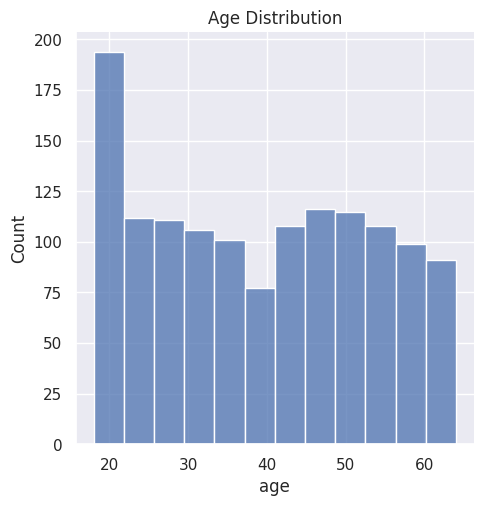

In [17]:
#distribution of age value
sns.set()
plt.figure(figsize=(9,10))
sns.displot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

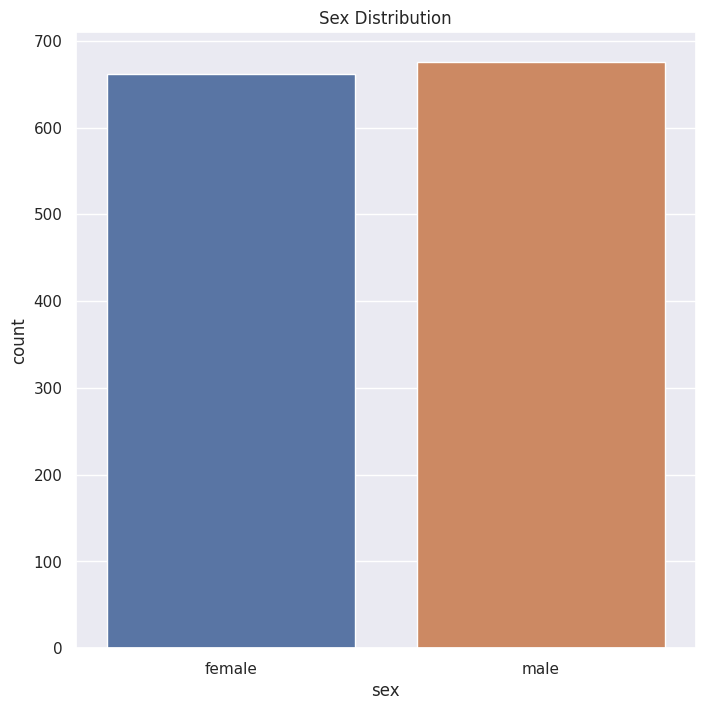

In [18]:
#gender coloumn
plt.figure(figsize=(8,8))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [19]:
insurance_dataset['sex'].value_counts

<bound method IndexOpsMixin.value_counts of 0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object>

<Figure size 800x800 with 0 Axes>

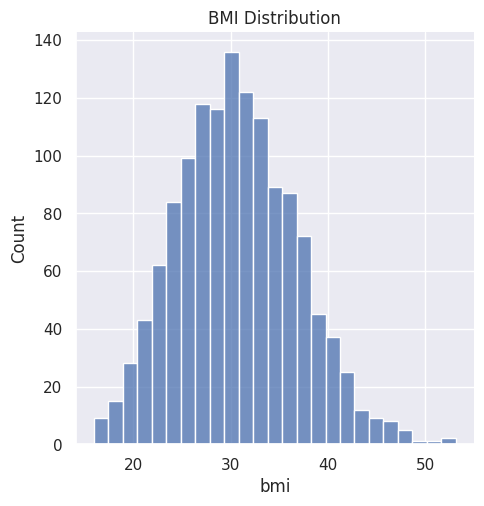

In [21]:
#BMI coloumn
plt.figure(figsize=(8,8))
sns.displot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range is -->18.5 to 24.9

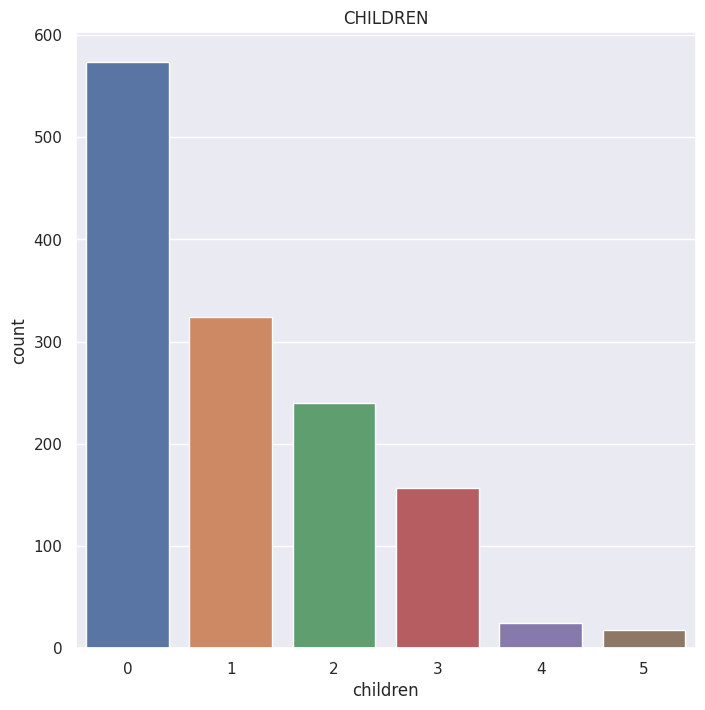

In [22]:
#children coloumn
plt.figure(figsize=(8,8))
sns.countplot(x='children',data=insurance_dataset)
plt.title('CHILDREN')
plt.show()

In [28]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

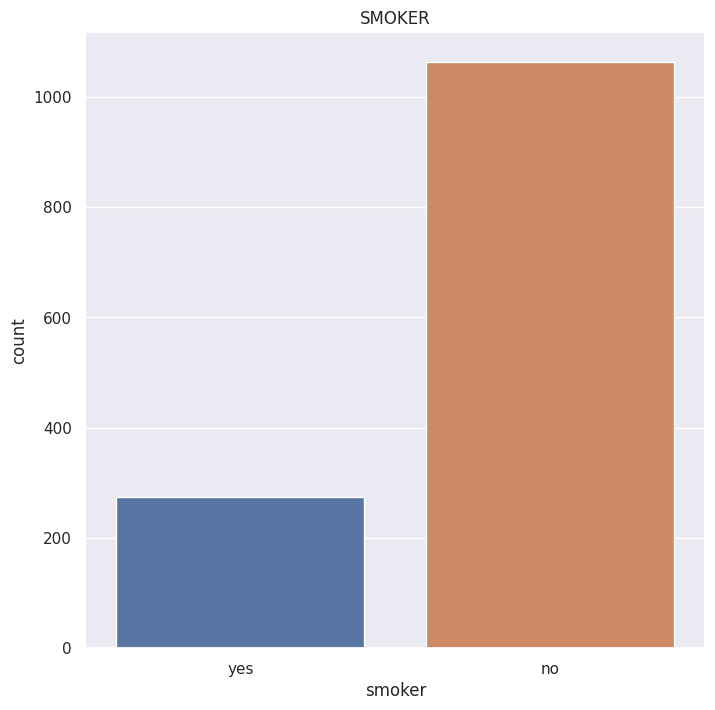

In [25]:
#smoker coloumn
plt.figure(figsize=(8,8))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('SMOKER')
plt.show()

In [27]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

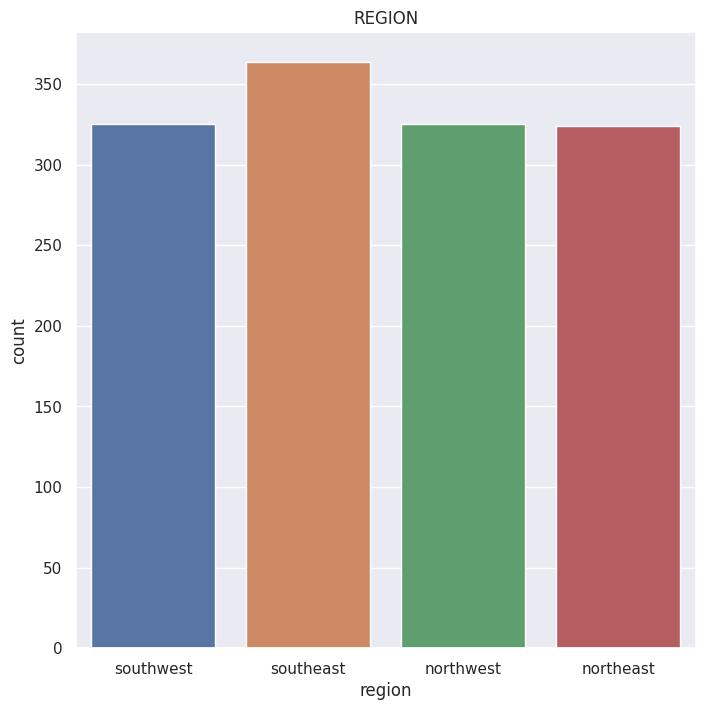

In [29]:
#region coloumn
plt.figure(figsize=(8,8))
sns.countplot(x='region',data=insurance_dataset)
plt.title('REGION')
plt.show()

In [30]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 900x1000 with 0 Axes>

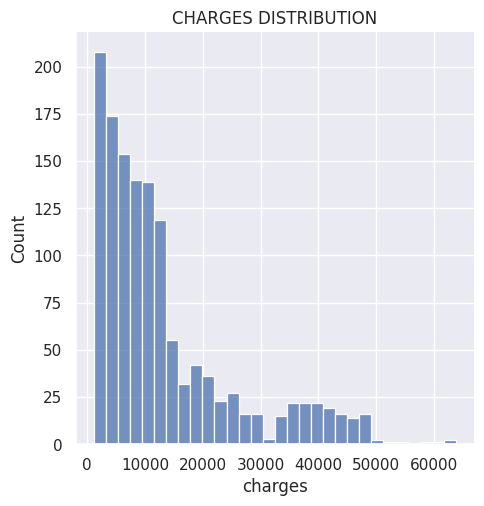

In [31]:
#distribution of  charges  value
sns.set()
plt.figure(figsize=(9,10))
sns.displot(insurance_dataset['charges'])
plt.title('CHARGES DISTRIBUTION')
plt.show()

DATA PRE- PROCESSING

ENCODING HTE CATEGORICAL FEATURES

In [35]:
#encoding sex coloumn
insurance_dataset.replace({'sex':{'male':0, 'female':1}},inplace=True)

#encoding smoker coloumn
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

#encoding region coloumn
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1,'northeast':2,'northwest':3}},inplace=True)


In [39]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting the features and Target

In [41]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [42]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [43]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


spliting the data into traing data and testing data

In [44]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [45]:
print(X.shape ,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression Model

In [46]:
#loading the linear regression model
regressor=LinearRegression()

In [47]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evalutaion

In [50]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [51]:
#R squareed Value
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared Value:' , r2_train)

R squared Value: 0.751505643411174


In [52]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [61]:
#R squareed Value
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R squared Value:' , r2_test)

R squared Value: 0.7447273869684076


Building a predidictive system

In [ ]:
input_data=(31,1,25,74,0,1,0)

#changing input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)


